**Graphs and Dijkstra's Algorithm**

Monday:
- Graph models and how to implement
- Shortest path problems on unweighted graphs
- Depth first search (trees) and breadth first search (graphs)

Today
- Depth first on graphs
- Dijkstra's algorithm


**Depth First for Graphs**
- Already storing paths so far when expanding their end nodes
- Encounter cycles when expanding to nodes already on the path
- Prevent "DFS" subtrees from looping back on themselves

- When recursive calls of a node's children return paths to target, pick the shortest one
- Maintain a shortest path yet found so later DFS substrees don't have to explore any deeper


Breadth-First
- Can rely on visited set
- - Each node in it already has shortest path from source
- Has to store all paths of length n before considering paths of length n + 1
- - Can be memory-intensive

Depth-First
- Has to consider multiple paths to same nodes
- - Subsequent paths might be shorter
- Won't explore any paths longer than shortest found so far
- - Could get lucky or unlucky based on how graph is set up


***Two Abstractions***
- Stack: Last-in first-out (LIFO)
- Queue: First-in first-out (FIFO)

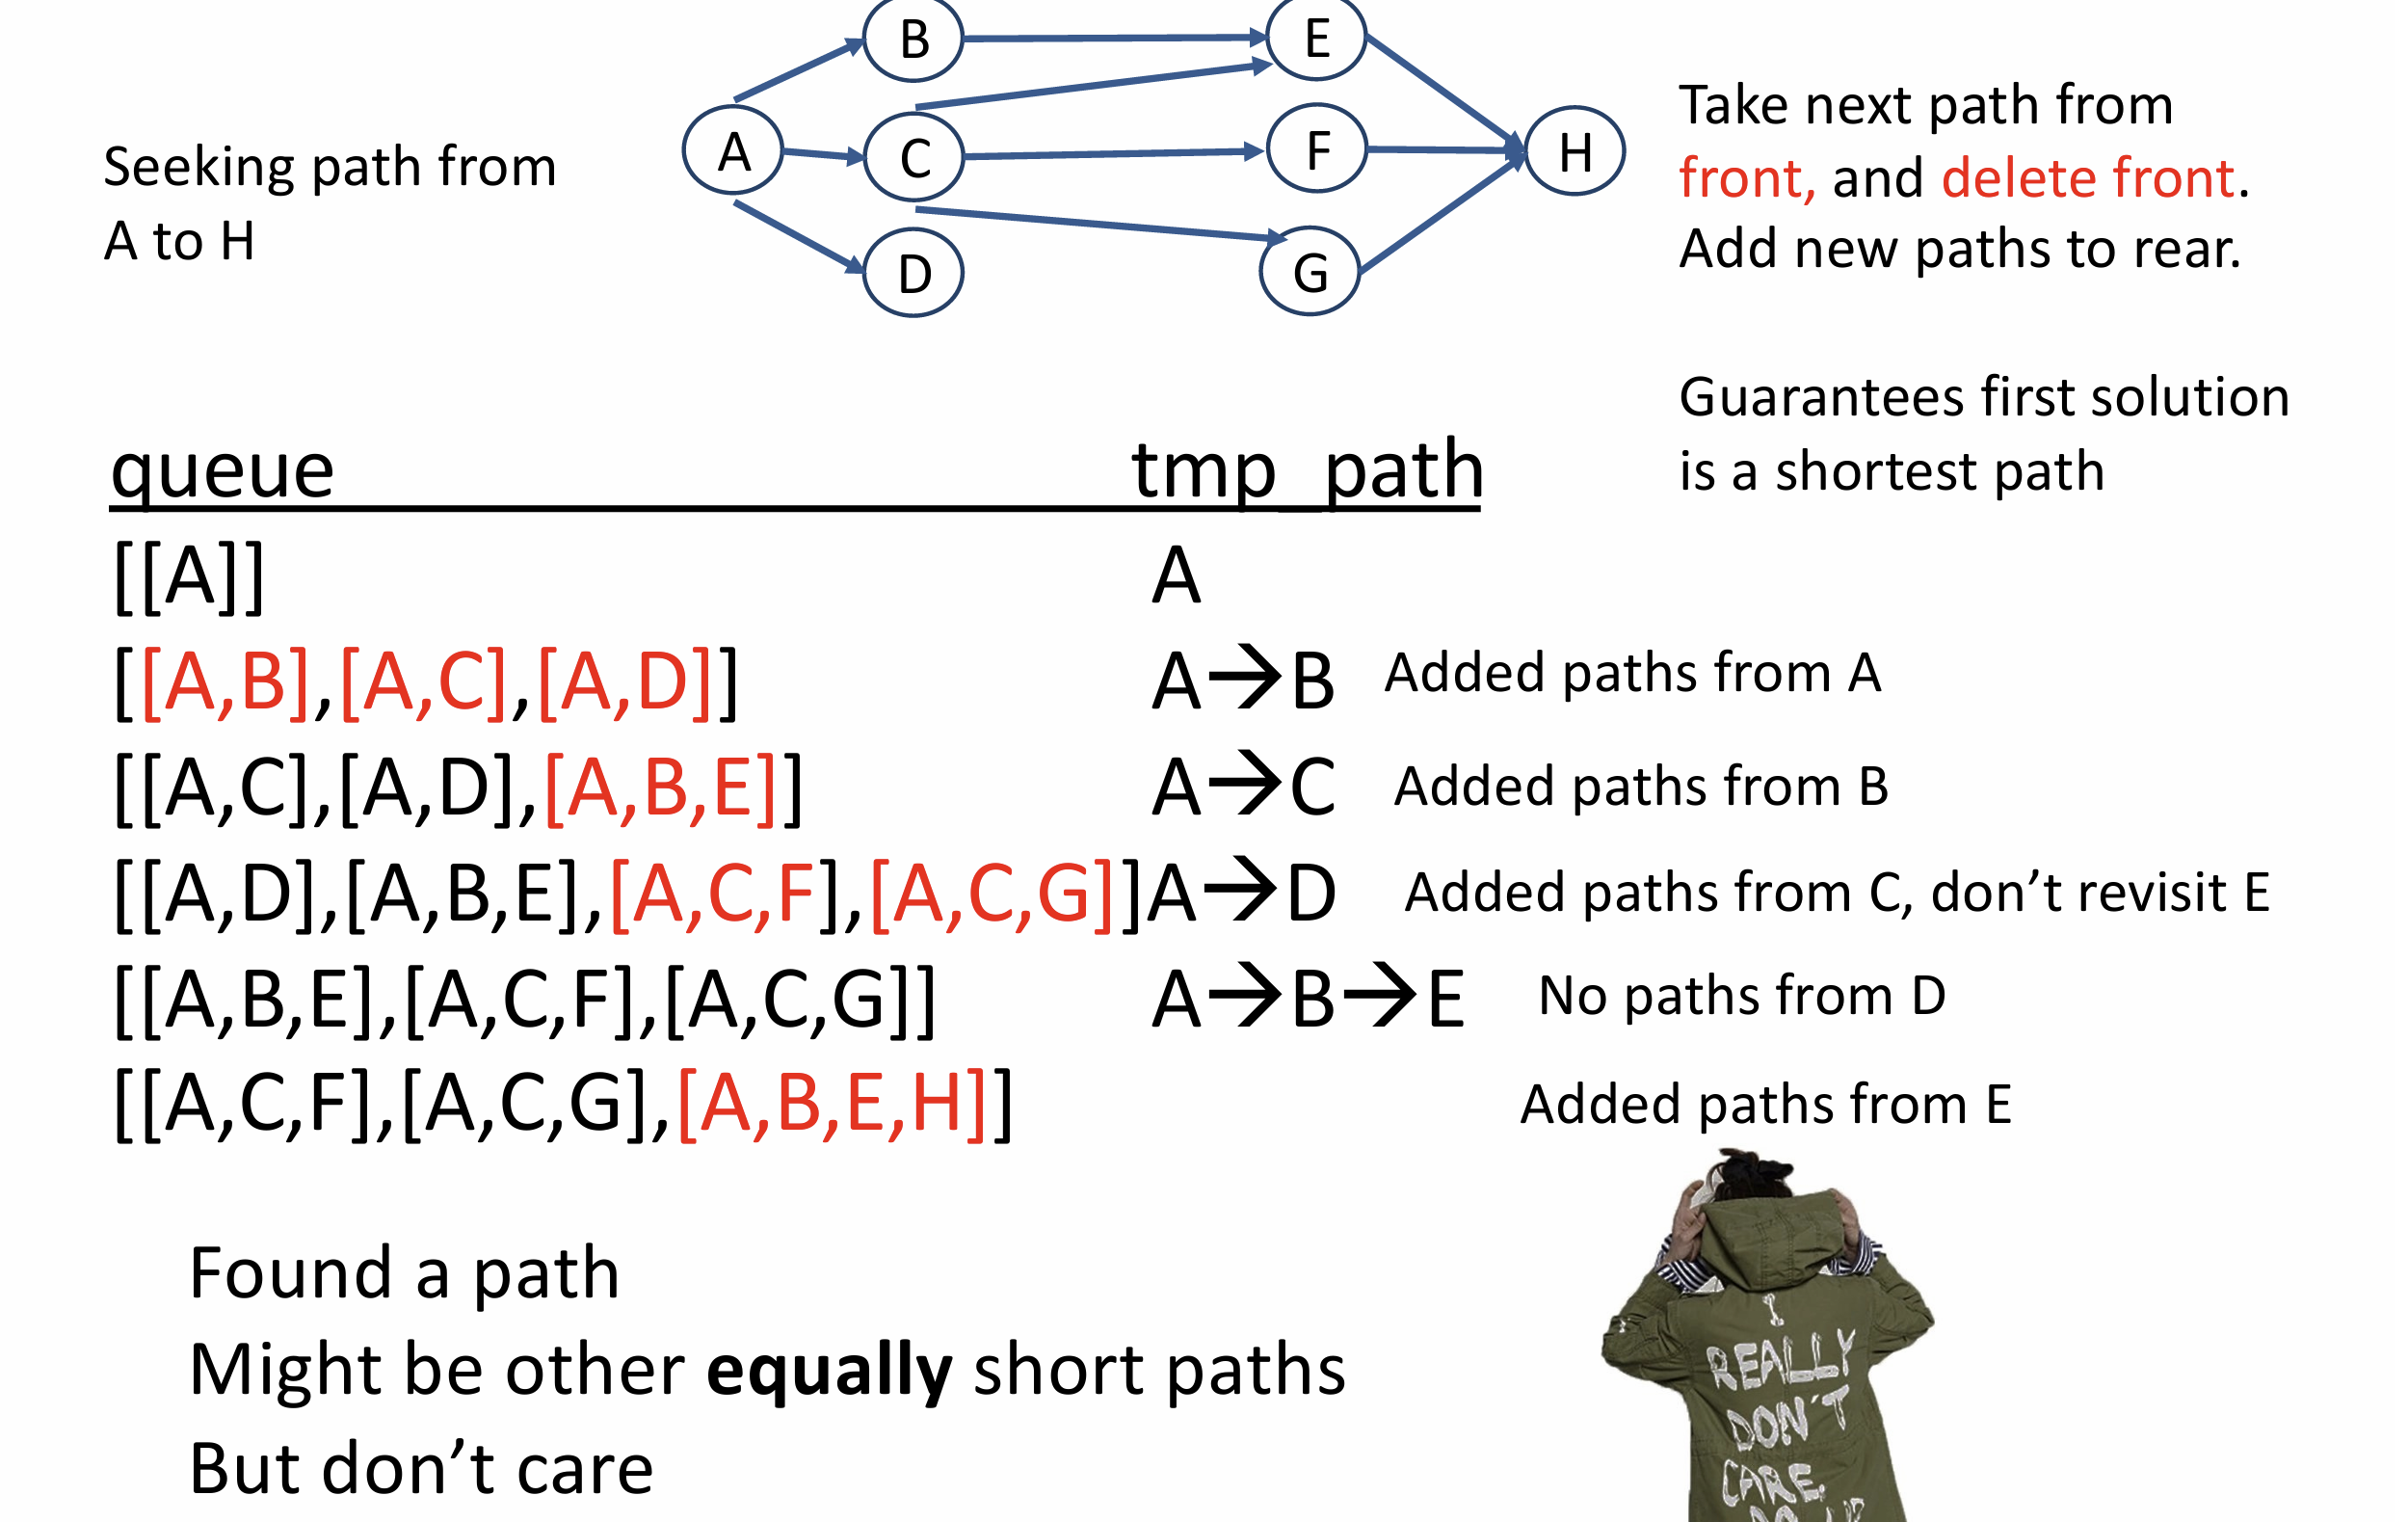

Breadth-first, use a queue because first path we find is shortest path we can ever find

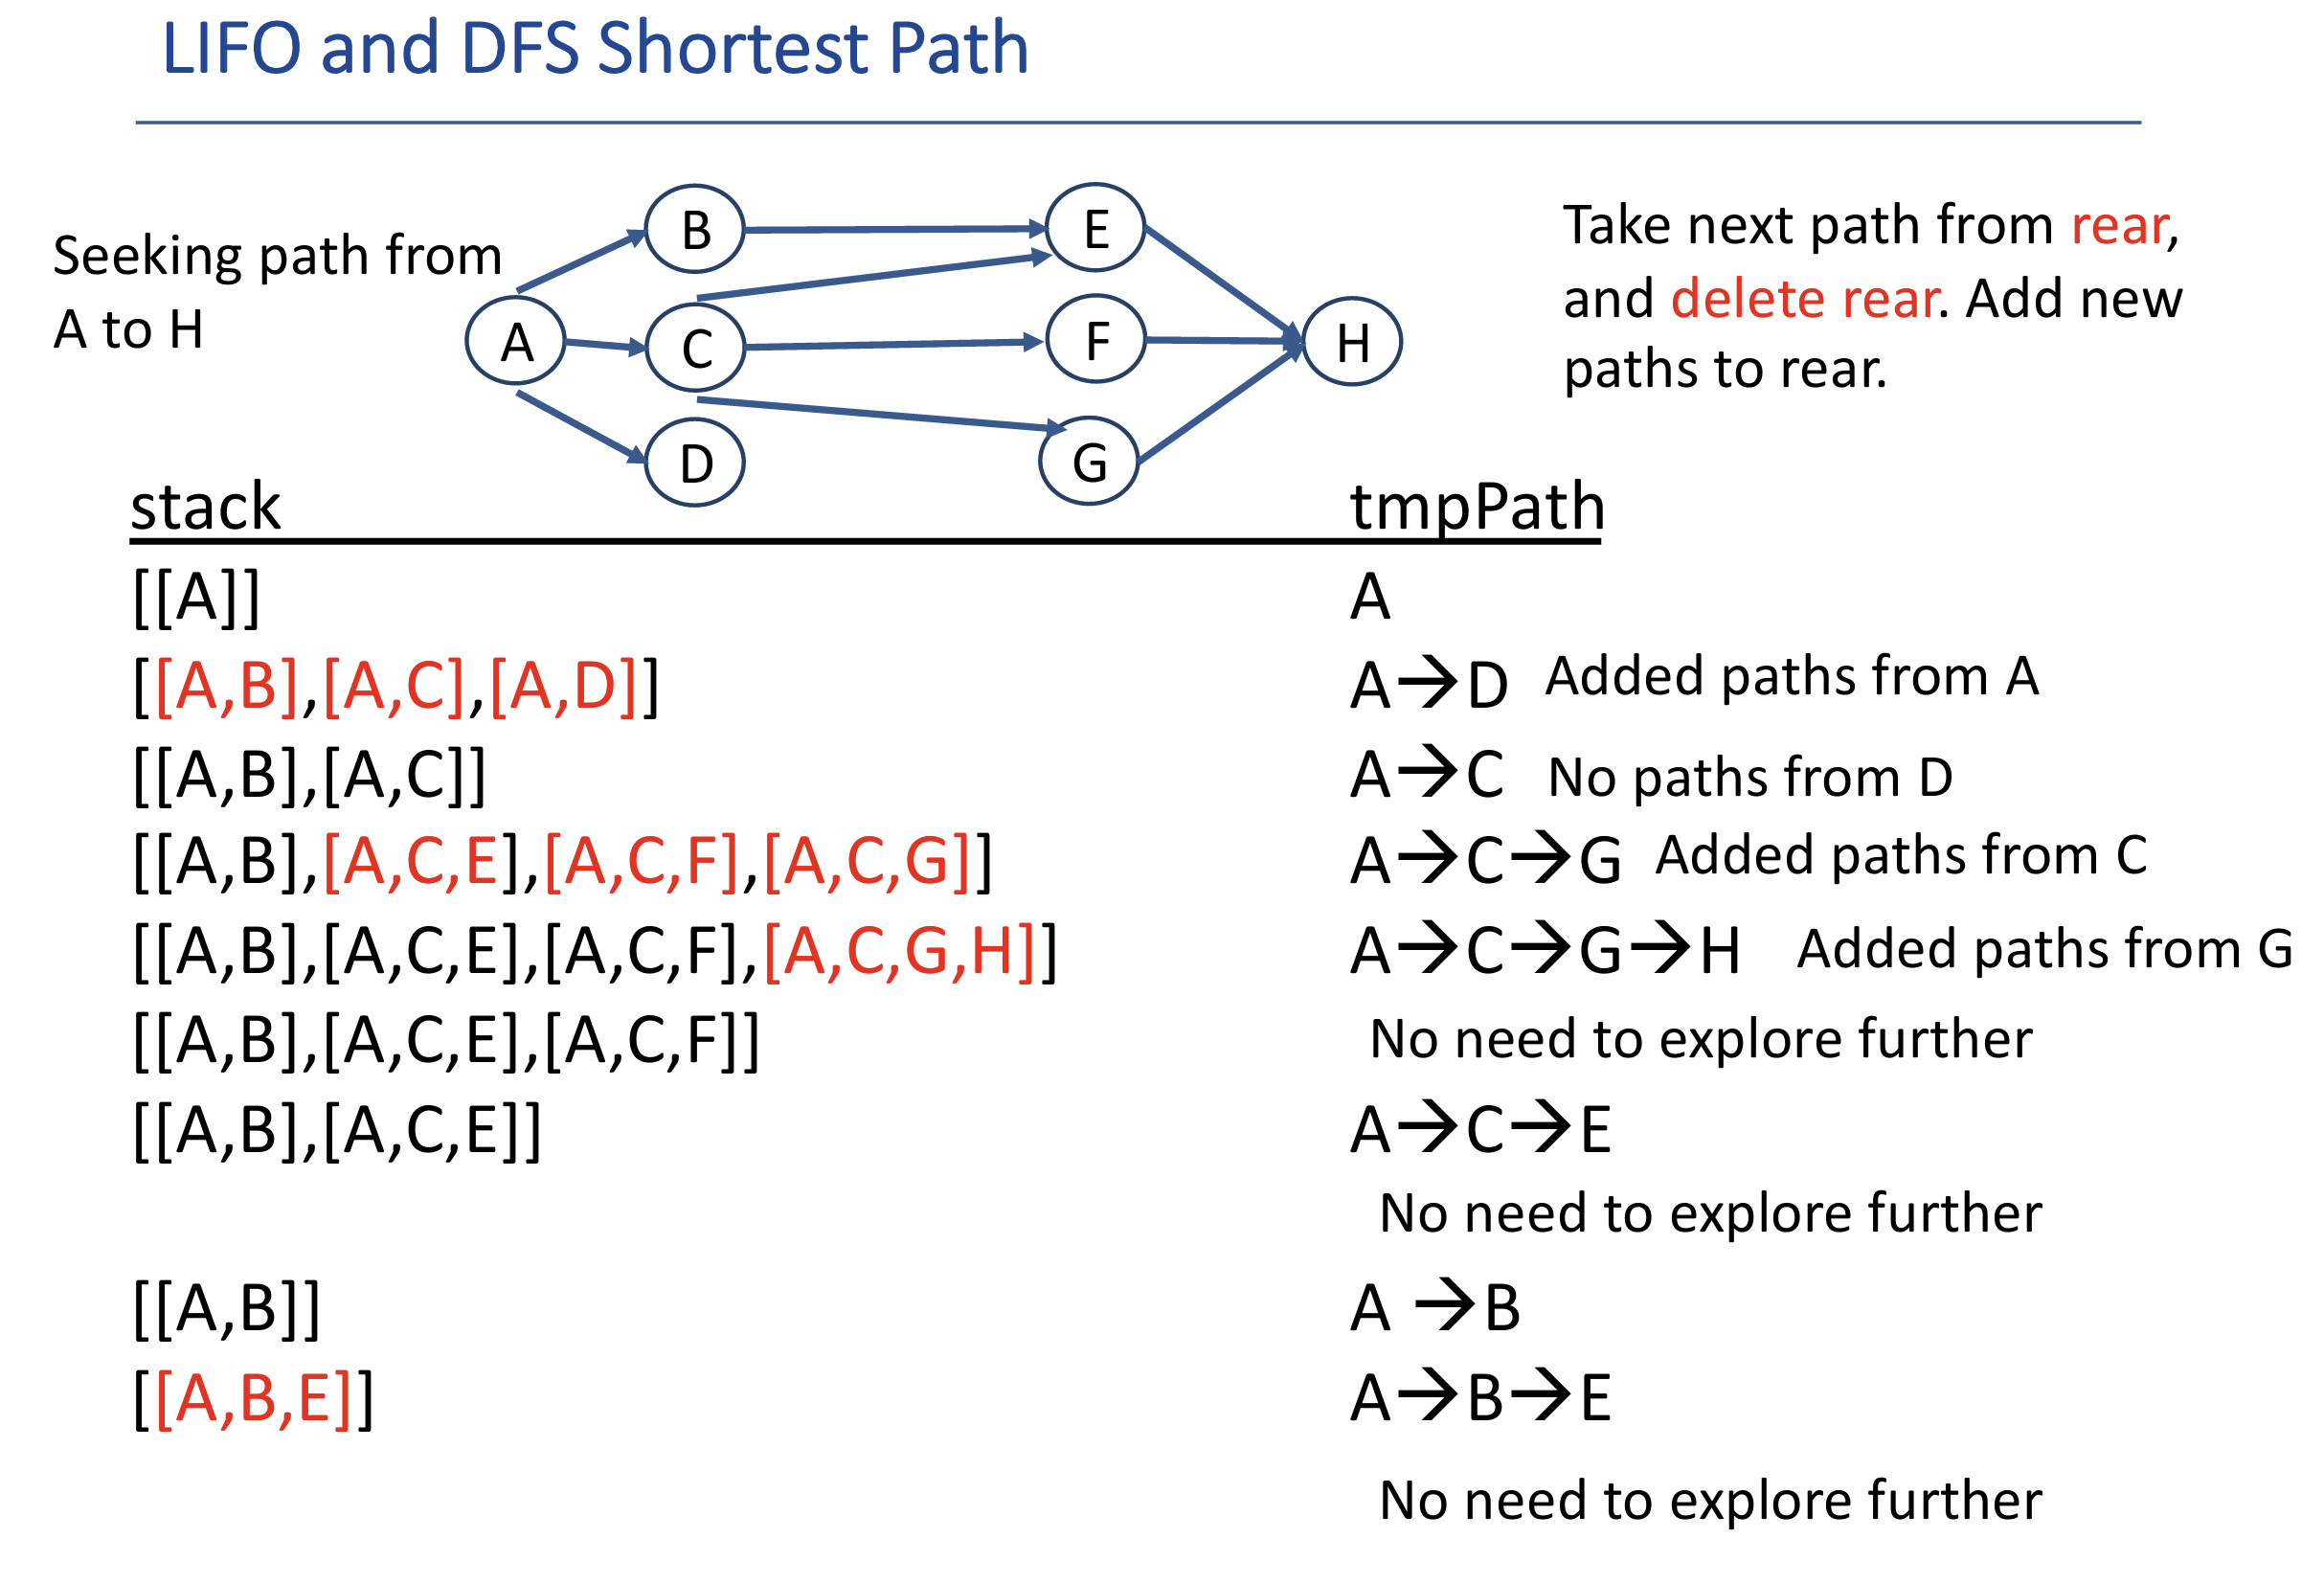

We can find one early but needed to continue so when we reach a node we have seen before or that has no connection, we delete that from the stack and move backwards



In [7]:
def bfs_fifo(graph, source, target):
    stack = [[source]]
    visited = set()
    visited.add(source)

    while stack:
        path = stack.pop(0)

        last_node = path[-1]

        for next_node in graph.children_of(last_node):
            if next_node in visited:
                continue
            new_path = path + [next_node]
            visited.add(next_node)

            if next_node == target:
                return new_path
            stack.append(new_path)

    return None

def dfs_lifo(graph, source, target):
    stack = [[source]]
    best_path = None

    while stack:
        path = stack.pop(-1)

        if best_path and len(path) + 1 >= len(best_path):
            continue

        last_node = path[-1]
        for next_node in graph.children_of(last_node):
            if next_node in path:
                continue
            new_path = path + [next_node]
            if next_node == target:
                if not best_path or len(new_path) < len(best_path):
                    best_path = new_path
                continue

            stack.append(new_path)

    return best_path


- Want to minimize the sum of the weights not just number of edges

Breadth: sort of stuck because first path not necessarily a winner
Depth: Easily modified to handle weighted paths



**Djikstra's Algorithm**
- 3 Key Data Structures and Basic Idea

1. `unvisited`: list of nodes that have not been visited (initially contains all)
2. `distance_to`: A dictionary mapping each node to the minimum distance found so far (initially 0 for start and infinity for others)
3. `predecessor`: A dictionary mapping each node to a predecssor node on the shortest path found so far from the start to that node (initially none for all)

Algorithm:
- Visit nodes in increasing order of distance from the start (as in BFS), updating distance_to and predecssor



In [1]:

class Digraph:
    """Represents a weighted directed graph as adjacency list,
       mapping each node to outgoing edges and their weights.
       Nodes are strings"""

    def __init__(self, nodes=()):
        self._edges = {}
        for node in nodes:
            self.add_node(node)

    def add_node(self, node):
        if node in self._edges:
            raise ValueError('Duplicate node')
        self._edges[node] = {}

    def add_edge(self, src, dest, weight = 1):
        if src not in self._edges:
            self.add_node(src)
        if dest not in self._edges:
            self.add_node(dest)
        self._edges[src][dest] = weight

    def has_node(self, node):
        return node in self._edges

    def get_all_nodes(self):
        return list(self._edges.keys())

    def outgoing_edges_of(self, node):
        return self._edges[node].copy()

    def children_of(self, node):
        return list(self.outgoing_edges_of(node).keys())

    def __str__(self):
        vals = []
        for src in self._edges:
            entry = src + ': '
            for dest, weight in self._edges[src].items():
                entry += f'{dest}({weight}), '
            if entry[-2:] != ': ': # There was at least one edge
                vals.append(entry[:-2])
            else:
                vals.append(entry[:-1])
        vals.sort(key=lambda x: x.split(':')[0])
        result = ''
        for v in vals:
            result += v + '\n'
        return result[:-1]


In [2]:
def Dijkstra(graph, start, end, to_print=False):
    unvisited = graph.get_all_nodes()
    distance_to = {node: float('inf') for node in graph.get_all_nodes()}
    distance_to[start] = 0

    predecessor = {node: None for node in graph.get_all_nodes()}

    while unvisited:
        current = min(unvisited, key=lambda node: distance_to[node])
        if distance_to[current] == float('inf'):
            break

        for neighbour in graph.children_of(current):
            alternative_path_distance = distance_to[current] + 1

            if alternative_path_distance < distance_to[neighbour]:
                distance_to[neighbour] = alternative_path_distance
                predecessor[neighbour] = current

        unvisited.remove(current)

    path = []
    current = end

    while predecessor[current] != None:
        path.insert(0, current)
        current = predecessor[current]

    if path != []:
        path.insert(0, current)
        return path

    return None

In [3]:
def build_city_graph():
    g = Digraph()
    g.add_edge('Boston', 'Providence')
    g.add_edge('Boston', 'New York')
    g.add_edge('Providence', 'Boston')
    g.add_edge('Providence', 'New York')
    g.add_edge('New York', 'Chicago')
    g.add_edge('Chicago', 'Denver')
    g.add_edge('Chicago', 'Phoenix')
    g.add_edge('Denver', 'Phoenix')
    g.add_edge('Denver', 'New York')
    g.add_edge('Los Angeles', 'Boston')
    return g
def path_to_string(path):
    """path is a list of nodes"""
    if path == None:
        return 'None'
    result = ''
    for node in path:
        result += node + '->'
    return result[:-2]
g = build_city_graph()
path = Dijkstra(g, 'Boston', 'Chicago', to_print = True)
print(path_to_string(path))

Boston->New York->Chicago


In [4]:
import random, pickle
def build_random_graph(graph_type, num_nodes, num_edges):
    """Generates a random graph of type graph_type with
    num_nodes nodes and num_edges edges."""
    if num_nodes <= 0 or num_edges < 0:
        raise ValueError("Number of nodes must be positive,\
                         and number of edges cannot be negative.")
    # Create an empty graph of the specified type
    graph = graph_type()
    # Generate random graph
    nodes = [str(i) for i in range(num_nodes)]
    for _ in range(num_edges):
        src = random.choice(nodes)
        dest = random.choice(nodes)
        weight = random.randint(1, 10)
        graph.add_edge(src, dest, weight)
    return graph
def gen_graphs(graph_sizes, graph_names):
    for num_nodes, num_edges in graph_sizes:
        print('Generate graph with', num_nodes, 'nodes', num_edges, 'edges')
        name = str(num_nodes) + 'By' + str(num_edges)
        g = build_random_graph(Digraph, num_nodes, num_edges)
        g.add_node('disconnected')
        f = open(name + '.pkl', 'wb')
        pickle.dump((g, num_nodes, num_edges), f)
        f.close()

# Generate graphs with varying number of nodes
# Keep node/edge ratio constant
ave_degree = 6
graph_sizes, graph_names = [], []
for num_nodes in range(1, 20002, 5000):
    num_edges = ave_degree*num_nodes
    graph_sizes.append((num_nodes, num_edges))
    graph_names.append(str(num_nodes) + 'By' + str(num_edges))

gen_graphs(graph_sizes, graph_names)

Generate graph with 1 nodes 6 edges
Generate graph with 5001 nodes 30006 edges
Generate graph with 10001 nodes 60006 edges
Generate graph with 15001 nodes 90006 edges
Generate graph with 20001 nodes 120006 edges


In [ ]:
import time
import matplotlib.pyplot as plt
def shortest_path(g, start, end, alg, to_print = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph
       using algorithm alg."""
    sp = alg(g, start, end, to_print)
    return sp

def print_shortest(start, end, sp):
    if sp != None:
        print('Shortest path from', start, 'to',
              end, 'is', path_to_string(sp))
    else:
        print('There is no path from', start, 'to', end)
def test_path(f_name, algorithm, num_trials, to_print = False):
    f = open(f_name + '.pkl', 'rb')
    data = pickle.load(f)
    f.close()
    print('\nTry graph with', data[1], 'nodes and', data[2],
          'edges', flush = True)
    tot_time = 0
    for t in range(num_trials):
        start_name = str(random.randint(0, data[1]-1))
        end_name = str(random.randint(0, data[1]-1))
        # end_name = 'disconnected' # to test worst case
        start_time = time.time()
        sp = shortest_path(data[0], start_name, end_name, algorithm, False)
        end_time = time.time()
        if to_print:
            print_shortest(start_name, end_name, sp)
        tot_time += end_time - start_time
    return (data[1], data[2], tot_time)

def label_plot(xLabel, num_trials, log = False):
    plt.xlabel('Number of ' + xLabel)
    plt.ylabel('Seconds')
    plt.title('Mean Time With Ave. Degree = ' + str(ave_degree) +\
              ' (' + str(num_trials) + ' trials)')
    plt.legend()

def test_algs(xLabel, sepPlots = False, num_trials = 1):
    algorithms = {"Dijkstra's": Dijkstra, 'BFS': bfs_fifo}
    for a in algorithms:
        print('\nTry', a, 'Algorithm', flush = True)
        node_vals, edge_vals, time_vals = [], [], []
        for g in graph_names:
            node_val, edge_val, time_val = test_path(g, algorithms[a],
                                                     num_trials)
            node_vals.append(node_val)
            edge_vals.append(edge_val)
            time_vals.append(time_val/num_trials)
        if sepPlots:
            plt.figure(a)
        if xLabel == 'Nodes':
            plt.plot(node_vals, time_vals, 'o', label = a)
        else:
            plt.plot(edge_vals, time_vals, 'o', label = a)
        label_plot(xLabel, num_trials, False)
        plt.savefig(xLabel + 'Performance.png', dpi = 300)

random.seed(2)
test_algs('Nodes', True, 20)


Try Dijkstra's Algorithm

Try graph with 1 nodes and 6 edges

Try graph with 5001 nodes and 30006 edges


KeyboardInterrupt: 

Single Source Graph

- Notie that end doesn't come into play until last step of the algorithm
- Predecessor can be easily used to quickly find a path from start to any node in graph

- If we run the algorithm with each node as a start, we can find shortest path between any pair of nodes (all-pairs)

Compute shortest paths between all n^2 pairs of nodes

Consider longest shortest path between nodes --> called diameter
- when designing networks we want to minimize it

Consider a connected graph (each node is connected to every other by a path)
- compute all shortest paths

For each node, count number of shortest paths that pass through it (called betweenes centrality)

- This measure identifies critical nodes

**Minimum Spanning Tree**
- Imagine a city with lots of roads but no bike lanes
- Assume there is a non-negative cost associated with adding them

- Objective Function: Minimize cost of adding bike lanes
- Constraint: it is possible to getn between any pair of addresses using only bike lanes

***Flow Problems***
- Flow network is a directed graph
- Source node: Creates a resource (production at that node)
- Sink node: Demand node that consumes the resource
- No other nodes can create or consume resource
- Each edge has
- - Capacity: max amount that can flow through edge (resource per second)
- - Expense: flow is the amount flowing through the edge

Given a desired flow F, from s to t

Objective: Find a flow through each edge that minimizes expense
Constraints:
1. Desired flow to t achieved
2. No edge exceeds capacity

Can we generalize to multiple sources and sinks?

Objective: Find a flow through each edge that minimizes expense

Constraints:
- Flow into each sink enough for what sink consumes
- Flow out of each sink is flow in minus what sink consumes
- No edge exceeds capacity


We get the unweighted shortest path problem if we
1. Set F to 1
2. Give all edges infinite capacity


**Graph Partition Problem**
- Electrical grid is connected network of subnetworks
- Failures in one sub-network can propogate to others
- Important to know what needs to be done to disconnect one collection of sub-networks from rest of network

Let (V, E) be an undirected graph representing the connections in the grid

Find a binary vector T of length |V| that minimizes the sum in range of V of T

Subject to the constraint that for all nodes if T[i] = 1 and T[j] = 0, there is no path from node i to node j



**Summary**
- Many important problems can be framed as finding `shortest path` on a graph
- - DFS and BFS are fundamental algorithms for solving
- Dijkstra's algo better for finding shortest path in large graphs with non-negative weighted edges
- - Many variants optimized for specific applications
- Graphs are powerful modeling framework
- - Capture relationships among objects
- - - Local structure composes into networks
- - Can then infer global properties and optimize them